#### Importing Libraries  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import random

In [86]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import tensorflow as tf 
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [6]:

from numpy import unravel_index

In [7]:
import os 

### Taking a sample of 75 images for each alphabet from A-Z handwritten dataset  

In [12]:
data = pd.read_csv("./../A_Z_Handwritten_data.csv")

<h5> data_div[i] will store all rows for ith alphabet </h5>

In [13]:
data_div = [0 for i in range(26)]

In [14]:
%%time 

grouped = data.groupby(data['0'])
for i in range(26) :
    data_div[i] = grouped.get_group(i)

Wall time: 3.63 s


In [15]:
data_div[5]

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
67520  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67521  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67522  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67523  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67524  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67525  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67526  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67527  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67528  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67529  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67530  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67531  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67532  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67533  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67534  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67535  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67536  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67537  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67538  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67539  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67540  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67541  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67542  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67543  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67544  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67545  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67546  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67547  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67548  5    0    0    0    0    0    0    0    0    0  ...      0      0   
67549  5    0    0    0    0    0    0    0    0    0  ...      0      0   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
68653  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68654  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68655  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68656  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68657  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68658  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68659  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68660  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68661  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68662  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68663  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68664  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68665  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68666  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68667  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68668  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68669  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68670  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68671  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68672  5    0    0    0    0    0    0    0    0    0  ...      0      0   
68673  5    0    0    0    0    0    0    0    0    0  

### Now splitting my data in X and y  

In [16]:
%%time 

y_div = [0 for i in range(26)] 
for i in range(26) :
    data_div[i] = data_div[i].sample(n = 75)
    y_div[i] = data_div[i]['0']
    del data_div[i]['0']

Wall time: 1.04 s


In [17]:
data_div[8]

0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
82667    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82256    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82653    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82457    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81994    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82375    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81708    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82498    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82201    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82557    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82414    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81879    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82587    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82180    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82010    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82663    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82020    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82459    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82441    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82269    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82113    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81804    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82039    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82140    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82102    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82169    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82597    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81958    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81990    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82015    0    0    0    0    0    0    0    0    0     0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
82422    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81900    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82042    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82758    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81678    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82642    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82260    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82528    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81957    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81676    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82535    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82338    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81743    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81824    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81664    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82077    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82212    0    0    0    0    0    0    0    0    0     0  ...      0      0   
82357    0    0    0    0    0    0    0    0    0     0  ...      0      0   
81996    0    0    0    0    0    0    0    0    0     0 

### Now we are done with Image input . Now we'll perform data augmentation and create a 150 images for each alphabet 

In [18]:
def get_idg() :
    idg = ImageDataGenerator(
    rotation_range=random.randint(0,10),
    zoom_range = random.uniform(0,0.5), 
    fill_mode='constant', cval=255
    )
    
    return idg 

def get_idg_no() :
    idg = ImageDataGenerator(
    rotation_range= 0 
    )
    
    return idg 
    

In [19]:
%%time

image_data_aug  = [0 for i in range(26)] 
y_data_aug = [0 for i in range(26)] 

for i in range(26) :
    a ,ya = get_idg_no().flow(data_div[i].values.reshape(len(data_div[i]),28,28,1), y_div[i],batch_size=75).next()
    b , yb = get_idg().flow(data_div[i].values.reshape(len(data_div[i]),28,28,1), y_div[i],batch_size=75).next()
    #print(a.shape)
    a = a.reshape(75,28*28)
    b = b.reshape(75,28*28)
    a = pd.DataFrame(a)
    b = pd.DataFrame(b)
    ya = pd.DataFrame(ya)
    yb = pd.DataFrame(yb)
    #print(a)
    aug_2 = (a,b)
    y_data_aug[i] = [y_div[i] for j in range(2)]
    #print(aug_4_y)
    image_data_aug[i] =  pd.concat(aug_2, ignore_index = True)
    y_data_aug[i] = pd.concat(y_data_aug[i]  ,ignore_index = True)
    #print(y_data_aug[i])
    
    print(i)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Wall time: 539 ms


In [20]:
image_data_aug[0]

0      1      2      3      4      5      6      7      8      9    \
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
14     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
15     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
20     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
21     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
22     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
23     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
24     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
27     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
29     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
120  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
121  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
122    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
123  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
124    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
125    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
126  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
127  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
128  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
129  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
130  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
131  255.0  255.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
132    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
133  255.0  255.0  255.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
134  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
135    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
136  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
137  255.0  255.0  255.0  255.0  255.0    0.0    0.0    0.0    0.0    0.0   
138  255.0  255.0  255.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
139  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
140

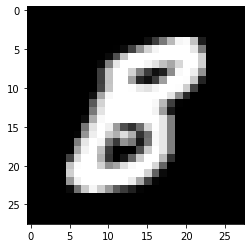

In [21]:
i_plot = image_data_aug[1].loc[1,:]
i_plot = np.array(i_plot)
plt.imshow(i_plot.reshape(28,28),cmap = 'gray')

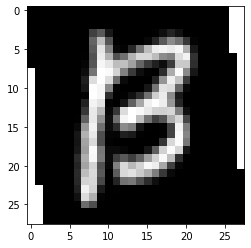

In [22]:
i_plot = image_data_aug[1].loc[79,:]
i_plot = np.array(i_plot)
plt.imshow(i_plot.reshape(28,28),cmap = 'gray')

### Training and Evaluation of Model  

In [23]:
pd_data = [0 for i in range(26)]
y_data = [0 for i in range(26)]

for i in range(26) :
    pd_data[i] = image_data_aug[i]
    y_data[i]  = y_data_aug[i]

In [24]:
X = pd.concat(pd_data)
y = pd.concat(y_data)

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, shuffle=True)

In [27]:

X_train = X_train.reshape(-1,28,28,1)

X_test = X = X_test.reshape(-1,28,28,1)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [28]:
def my_model(width,height,channel) :
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (width,height,channel)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.20))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.20)) 
    
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.20)) 
    
    
    model.add(Flatten())
    model.add(Dense(512, activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(26, activation = "softmax"))
    
    
    return model
    
    

### If you want to train model again then can this following script but if you want to use my pre trained model then skip this section and see the next section 

In [29]:
model = my_model(28,28,1)

In [30]:
%%time 

model.compile(optimizer='adamax', loss = 'categorical_crossentropy', metrics=['accuracy'])

Wall time: 31.9 ms


<h5> To save my model in the specified checkpoint path </h5>

In [31]:

checkpoint_path = "cp1.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64, shuffle=True,callbacks=[cp_callback])

Train on 3120 samples, validate on 780 samples
Epoch 1/25
3072/3120 [============================>.] - ETA: 0s - loss: 2.6362 - accuracy: 0.2852
Epoch 00001: saving model to cp1.ckpt
3120/3120 [==============================] - 17s 5ms/sample - loss: 2.6185 - accuracy: 0.2904 - val_loss: 2.7579 - val_accuracy: 0.1756
Epoch 2/25
3072/3120 [============================>.] - ETA: 0s - loss: 1.1135 - accuracy: 0.6657
Epoch 00002: saving model to cp1.ckpt
3120/3120 [==============================] - 14s 5ms/sample - loss: 1.1149 - accuracy: 0.6654 - val_loss: 1.2842 - val_accuracy: 0.7077
Epoch 3/25
3072/3120 [============================>.] - ETA: 0s - loss: 0.7246 - accuracy: 0.7702
Epoch 00003: saving model to cp1.ckpt
3120/3120 [==============================] - 14s 4ms/sample - loss: 0.7218 - accuracy: 0.7708 - val_loss: 0.6459 - val_accuracy: 0.8526
Epoch 4/25
3072/3120 [============================>.] - ETA: 0s - loss: 0.5187 - accuracy: 0.8418
Epoch 00004: saving model to cp1.ckpt
3

#### Using pre trained Model  

In [33]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [34]:
print(latest)

cp1.ckpt


In [42]:
model2 = my_model(28,28,1)
model2.compile(optimizer='adamax', loss = 'categorical_crossentropy', metrics=['accuracy'])
model2.load_weights(latest)

In [36]:
def max_index(y_test) :
    ans = [0 for i in range(len(y_test))]
    for i in range(len(y_test)) :
        index = unravel_index(y_test[i].argmax(), y_test[i].shape)
        ans[i] = index[0] 
    return ans 

In [37]:
print(model2.predict_classes(X_test[:25]))
print(max_index(y_test[:25]))

[18 14  9  4 17 17 19  8  2  0 18 16 24 25 16  1 21 14  5 16 11 14  3  5
  6]
[18, 14, 9, 4, 17, 17, 19, 8, 2, 7, 18, 16, 24, 25, 16, 1, 21, 14, 5, 16, 11, 14, 3, 5, 6]


In [38]:
model2.evaluate(X_test,y_test)                    ##This is pretrained model 

780/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.10156554392515085, 0.96666664]

In [80]:
accuracy1 = model.evaluate(X_test,y_test)[1]                      #### This is trained model (Currently trained)

780/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [79]:
model3 = my_model(28,28,1)
model3.compile(optimizer='adamax', loss = 'categorical_crossentropy', metrics=[tensorflow.keras.metrics.Recall()])
model3.load_weights(latest)
recall1 = model3.evaluate(X_test,y_test)[1]
model4 = my_model(28,28,1)
model4.compile(optimizer='adamax', loss = 'categorical_crossentropy', metrics=[tensorflow.keras.metrics.Precision()])
model4.load_weights(latest)
precision1 = model4.evaluate(X_test,y_test)[1]

780/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

780/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [84]:
#correct one
print("accuracy  ->  " , accuracy1)
print("precision ->  " , precision1)
print("recall ->  " , recall1)

#harmonic mean of precision and recall
f1score = (2*precision1*recall1) / (precision1 + recall1)

print("f1 score ->  " , f1score)

accuracy  ->   0.96666664
precision ->   0.9690323
recall ->   0.96282053
f1 score ->   0.9659164219993307


In [88]:
# yhat = model2.predict_classes(X_test)
# y = max_index(y_test)
# accuracy = accuracy_score(y, yhat)
# print("accuracy  ->  " , accuracy)
# precision = precision_score(y, yhat,average='weighted')
# print("precision ->  " , precision)
# recall = recall_score(y, yhat,average='weighted')
# print("recall ->  " , recall)
# f1 = f1_score(y, yhat,average='weighted')
# print("f1 score ->  " , f1)